In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score

from sklearn.preprocessing import LabelEncoder

In [27]:
df=pd.read_csv("survival.csv")

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [30]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [31]:
median=df['Age'].median()

In [32]:
df.fillna({'Age':median},inplace=True)

In [33]:
df.duplicated().sum()

0

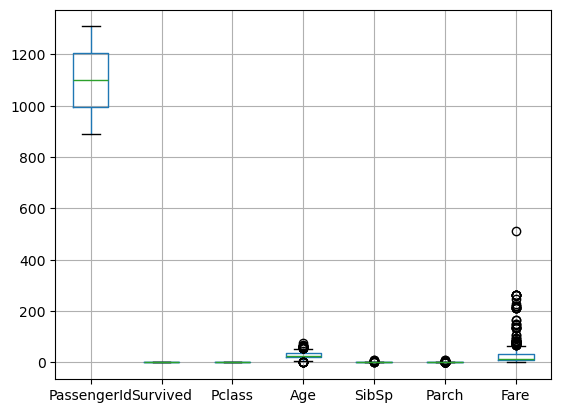

In [34]:
#outlier detection
df.boxplot()
plt.show()

In [35]:
df['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

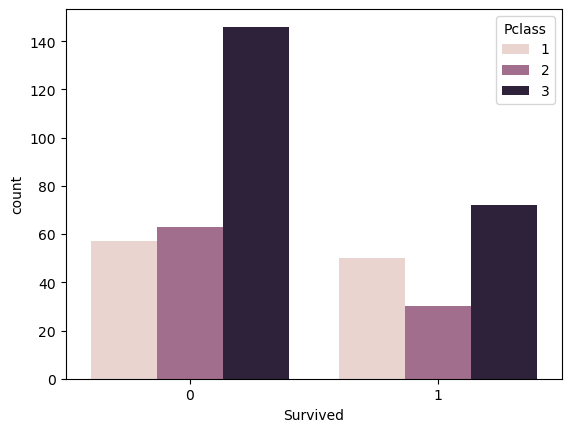

In [36]:
sns.countplot(x=df['Survived'],hue=df['Pclass'])
plt.show()

In [37]:
df['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

In [38]:
labelencoder=LabelEncoder()


In [39]:
df['Sex']=labelencoder.fit_transform(df['Sex'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",1,27.0,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",1,27.0,0,0,359309,8.0500,NaN,S


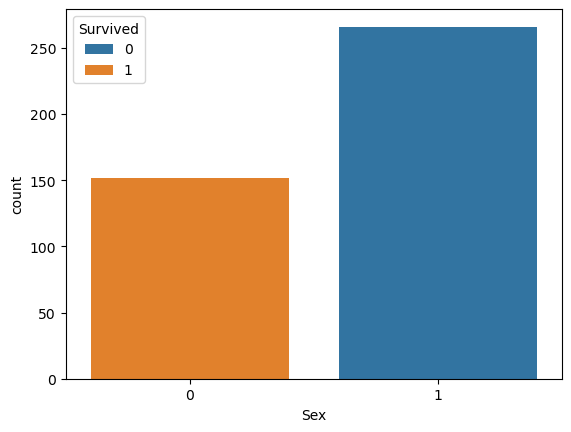

In [40]:
sns.countplot(x=df['Sex'],hue=df['Survived'])
plt.show()

In [45]:
# from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


x = df[['PassengerId','Pclass','Age','Sex','SibSp','Parch']]
y = df['Survived']


In [148]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.85,random_state=100)

In [149]:
logical_model=LogisticRegression( random_state=100)


In [150]:
logical_model.fit(x_train,y_train)

LogisticRegression(random_state=100)

In [151]:
y_pred=logical_model.predict(x_train)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

In [152]:
r2_score(y_train,y_pred)

1.0

In [153]:
#testing validation
y_pred1=logical_model.predict(x_test)
y_pred1

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,

In [154]:
logical_model.predict_proba(x_test)

array([[0.22763428, 0.77236572],
       [0.21668606, 0.78331394],
       [0.90652326, 0.09347674],
       [0.83773779, 0.16226221],
       [0.92135165, 0.07864835],
       [0.91140039, 0.08859961],
       [0.90840683, 0.09159317],
       [0.91756527, 0.08243473],
       [0.07100827, 0.92899173],
       [0.2280346 , 0.7719654 ],
       [0.90121229, 0.09878771],
       [0.8684288 , 0.1315712 ],
       [0.91206746, 0.08793254],
       [0.8662884 , 0.1337116 ],
       [0.89147043, 0.10852957],
       [0.18866699, 0.81133301],
       [0.90606959, 0.09393041],
       [0.92204131, 0.07795869],
       [0.84804187, 0.15195813],
       [0.20794818, 0.79205182],
       [0.21925691, 0.78074309],
       [0.91600464, 0.08399536],
       [0.22662692, 0.77337308],
       [0.89069516, 0.10930484],
       [0.90618469, 0.09381531],
       [0.81007499, 0.18992501],
       [0.92096891, 0.07903109],
       [0.92375632, 0.07624368],
       [0.20477464, 0.79522536],
       [0.9107624 , 0.0892376 ],
       [0.

In [155]:
accuracy_score(y_test,y_pred1)

0.9943820224719101

In [156]:
from sklearn.metrics import confusion_matrix,classification_report

In [157]:
conf=confusion_matrix(y_test,y_pred1)
conf

array([[225,   2],
       [  0, 129]], dtype=int64)

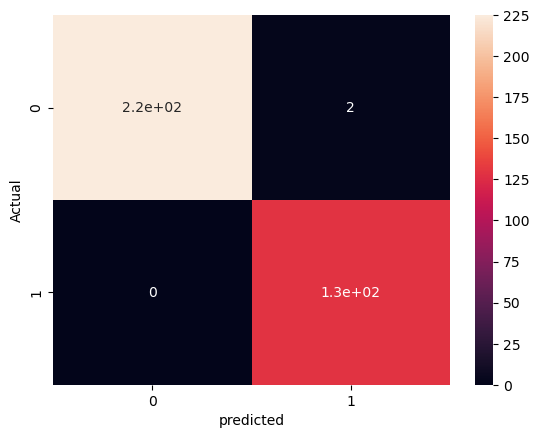

In [158]:
sns.heatmap(conf,annot=True)
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()

In [159]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       227
           1       0.98      1.00      0.99       129

    accuracy                           0.99       356
   macro avg       0.99      1.00      0.99       356
weighted avg       0.99      0.99      0.99       356



In [160]:
from sklearn.metrics import roc_curve,roc_auc_score

In [161]:
pred_proba=logical_model.predict_proba(x_test)[:,1]

In [162]:
auc_score=roc_auc_score(y_test,pred_proba)
auc_score

0.9973021889833692

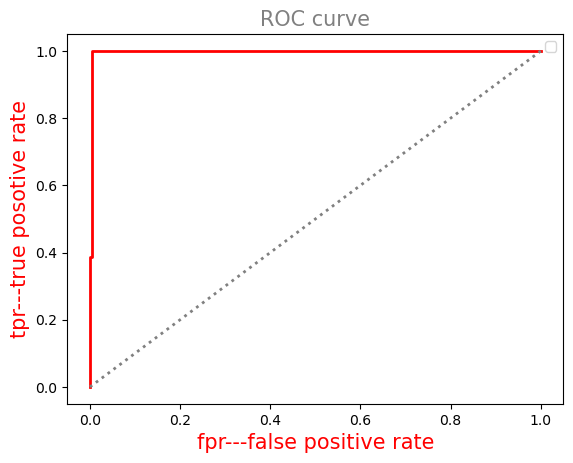

In [168]:
import warnings
warnings.filterwarnings("ignore")

fpr,tpr,thr=roc_curve(y_test,pred_proba)
plt.plot(fpr,tpr,color='red',linewidth=2)
plt.plot([0,1],color='grey',linewidth=2,linestyle=':')
plt.xlabel("fpr---false positive rate",color='red',size=15)
plt.ylabel("tpr---true posotive rate",color='red',size=15)
plt.title("ROC curve",color='grey',size=15)
plt.legend()
plt.show()


In [165]:
## import warnings
warnings.filterwarnings("ignore")
while True:
    try:
        pclass = int(input("Enter Passenger Class (1, 2, or 3): "))
        if pclass not in [1, 2, 3]:
            print("Invalid class! Please enter 1, 2, or 3.")
            continue
        break
    finally:
        print("----------------------")
while True:
    try:
        sex = int(input("Enter 0 if Female, 1 if Male: "))
        if sex not in [0, 1]:
            print("Invalid input! Please enter 0 for Female or 1 for Male.")
            continue
        break
    finally:
        print("-----------------------------")
    
while True:
    try:
        age = float(input("Enter Age: "))
        if age < 0:
            print("Age cannot be negative! Please enter a valid age.")
            continue
        break
    finally:
        print("--------------------------------")
passengerid=int(input("enter a passenger id:"))
sibsp=int(input("enter no of sibilings and spourse:"))
parch=int(input("enter the parch:"))
res=logical_model.predict([[passengerid,pclass,age,sex,sibsp,parch]])
if res == 0:
    print("Not Survived")
else:
    print("Survived")

Enter Passenger Class (1, 2, or 3):  3


----------------------


Enter 0 if Female, 1 if Male:  0


-----------------------------


Enter Age:  22


--------------------------------


enter a passenger id: 896
enter no of sibilings and spourse: 1
enter the parch: 1


Survived
